# Loan Default Prediction -  part 1 EDA

_by Yidan Nie_


# Goal of this project:

- For lending companies, one of the core business challenges is predicting each potential borrower’s chance of default if the company were to approve their loan application.
- I will go through the end-to-end analytical process to learn from this sample of loan applicants' behavior and build predictive models to predict probability of default for:

_* helping the lending company make informed decisions_

_* minimizing the risk of each decision of approval_

_* making decisioning process more efficient and effective_



<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Some-Manipulations" data-toc-modified-id="Some-Manipulations-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Some Manipulations</a></span></li><li><span><a href="#Build-meta-info-table" data-toc-modified-id="Build-meta-info-table-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Build meta-info table</a></span></li></ul></li><li><span><a href="#In-depth-EDA" data-toc-modified-id="In-depth-EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>In-depth EDA</a></span><ul class="toc-item"><li><span><a href="#numerical-variables" data-toc-modified-id="numerical-variables-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>numerical variables</a></span><ul class="toc-item"><li><span><a href="#What-I-find:" data-toc-modified-id="What-I-find:-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>What I find:</a></span></li></ul></li><li><span><a href="#Nominal-variables" data-toc-modified-id="Nominal-variables-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Nominal variables</a></span><ul class="toc-item"><li><span><a href="#What-I-find:" data-toc-modified-id="What-I-find:-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>What I find:</a></span></li></ul></li><li><span><a href="#Ordinal-variables" data-toc-modified-id="Ordinal-variables-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Ordinal variables</a></span><ul class="toc-item"><li><span><a href="#What-I-find:" data-toc-modified-id="What-I-find:-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>What I find:</a></span></li></ul></li><li><span><a href="#Binary-variables" data-toc-modified-id="Binary-variables-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Binary variables</a></span></li><li><span><a href="#Correlations" data-toc-modified-id="Correlations-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Correlations</a></span><ul class="toc-item"><li><span><a href="#What-I-find:" data-toc-modified-id="What-I-find:-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>What I find:</a></span></li></ul></li><li><span><a href="#Borrowers-who-default-(-target=1-)" data-toc-modified-id="Borrowers-who-default-(-target=1-)-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Borrowers who default ( target=1 )</a></span><ul class="toc-item"><li><span><a href="#nominal-variables" data-toc-modified-id="nominal-variables-2.6.1"><span class="toc-item-num">2.6.1&nbsp;&nbsp;</span>nominal variables</a></span></li><li><span><a href="#Ordinal-variables" data-toc-modified-id="Ordinal-variables-2.6.2"><span class="toc-item-num">2.6.2&nbsp;&nbsp;</span>Ordinal variables</a></span></li><li><span><a href="#Binary-variable" data-toc-modified-id="Binary-variable-2.6.3"><span class="toc-item-num">2.6.3&nbsp;&nbsp;</span>Binary variable</a></span></li></ul></li><li><span><a href="#variable-about-State" data-toc-modified-id="variable-about-State-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>variable about State</a></span></li></ul></li></ul></div>

## Exploratory Data Analysis 

In [80]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
data = pd.read_csv('Data.csv')

In [4]:
data.head()

,id,loan_amnt,term,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,last_credit_pull_d,last_fico_range_high,last_fico_range_low,acc_now_delinq,delinq_amnt,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,inq_last_6mths,inq_last_12m
0,88787390,30000,60 months,761.64,6 years,RENT,100100.0,Verified,Sep-16,Current,...,Dec-16,709,705,0,0,0,26.0,NaN,0,0.0
1,74722660,30000,60 months,692.93,10+ years,MORTGAGE,235000.0,Source Verified,Apr-16,Current,...,Dec-16,649,645,0,0,1,16.0,NaN,1,3.0
2,67919555,16000,60 months,379.39,6 years,RENT,84000.0,Not Verified,Jan-16,Current,...,Dec-16,739,735,0,0,0,80.0,NaN,0,2.0
3,54027458,14000,36 months,439.88,5 years,RENT,50000.0,Source Verified,Jul-15,Fully Paid,...,Oct-16,749,745,0,0,0,NaN,42.0,0,NaN
4,72594974,7500,36 months,252.67,3 years,MORTGAGE,68000.0,Not Verified,Feb-16,Fully Paid,...,Dec-16,709,705,0,0,0,NaN,NaN,2,5.0


### Overview
* The target column 'loan_status' signifies whether or not a borrower defaults or not.

In [129]:
# Filter all rows for which the loan_status is "current" 
data.drop(data[data['loan_status']=='Current'].index, inplace = True)
data.head()

,id,loan_amnt,term,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,last_credit_pull_d,last_fico_range_high,last_fico_range_low,acc_now_delinq,delinq_amnt,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,inq_last_6mths,inq_last_12m
3,54027458,14000,36 months,439.88,5 years,RENT,50000.0,Source Verified,Jul-15,Fully Paid,...,Oct-16,749,745,0,0,0,NaN,42.0,0,NaN
4,72594974,7500,36 months,252.67,3 years,MORTGAGE,68000.0,Not Verified,Feb-16,Fully Paid,...,Dec-16,709,705,0,0,0,NaN,NaN,2,5.0
6,71061534,25000,36 months,870.44,5 years,RENT,55000.0,Verified,Feb-16,Fully Paid,...,Nov-16,759,755,0,0,0,NaN,NaN,1,3.0
7,54474095,12000,36 months,382.55,5 years,RENT,30000.0,Not Verified,Jul-15,Fully Paid,...,Oct-15,749,745,0,0,0,NaN,NaN,0,NaN
21,45704513,30000,60 months,677.85,10+ years,RENT,84000.0,Verified,Apr-15,Fully Paid,...,Oct-16,669,665,0,0,0,NaN,NaN,0,NaN


In [15]:
#dimension of the data frame
data.shape
print ('Number of rows: ' + str(data.shape[0]))
print ('Number of columns: ' + str(data.shape[1]))

Number of rows: 17571
Number of columns: 26


In [16]:
#Distribution of the label column
dist = data['loan_status'].value_counts()
print(dist)

print('The non-default class is roughly',round(dist[0]/dist[1],1),'times more than the default class')

Fully Paid    11534
Default        6037
Name: loan_status, dtype: int64
The non-default class is roughly 1.9 times more than the default class


In [17]:
#check types of data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17571 entries, 3 to 79991
Data columns (total 26 columns):
id                        17571 non-null int64
loan_amnt                 17571 non-null int64
term                      17571 non-null object
installment               17571 non-null float64
emp_length                16566 non-null object
home_ownership            17571 non-null object
annual_inc                17571 non-null float64
verification_status       17571 non-null object
issue_d                   17571 non-null object
loan_status               17571 non-null object
purpose                   17571 non-null object
addr_state                17571 non-null object
dti                       17571 non-null float64
earliest_cr_line          17571 non-null object
fico_range_low            17571 non-null int64
fico_range_high           17571 non-null int64
last_credit_pull_d        17571 non-null object
last_fico_range_high      17571 non-null int64
last_fico_range_low       175

### Some Manipulations

- Encode 'default' as 1 and 'Fully Paied' as 0.
- Drop variables that are not available at time of loan application

In [130]:
#'default' is encoded as 1 and 'Fully Paied' is encoded as 0.
data['loan_status'] = (data.loan_status == 'Default').astype(int)
data.reset_index(drop=True, inplace=True)
data.head()

,id,loan_amnt,term,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,last_credit_pull_d,last_fico_range_high,last_fico_range_low,acc_now_delinq,delinq_amnt,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,inq_last_6mths,inq_last_12m
0,54027458,14000,36 months,439.88,5 years,RENT,50000.0,Source Verified,Jul-15,0,...,Oct-16,749,745,0,0,0,NaN,42.0,0,NaN
1,72594974,7500,36 months,252.67,3 years,MORTGAGE,68000.0,Not Verified,Feb-16,0,...,Dec-16,709,705,0,0,0,NaN,NaN,2,5.0
2,71061534,25000,36 months,870.44,5 years,RENT,55000.0,Verified,Feb-16,0,...,Nov-16,759,755,0,0,0,NaN,NaN,1,3.0
3,54474095,12000,36 months,382.55,5 years,RENT,30000.0,Not Verified,Jul-15,0,...,Oct-15,749,745,0,0,0,NaN,NaN,0,NaN
4,45704513,30000,60 months,677.85,10+ years,RENT,84000.0,Verified,Apr-15,0,...,Oct-16,669,665,0,0,0,NaN,NaN,0,NaN


In [131]:
# drop variables that are not available at time of loan application
data = train.drop(['last_credit_pull_d','last_fico_range_high','last_fico_range_low'], axis=1)

### Build meta-info table
* To facilitate the data management, storing meta-information about the variables in a DataFrame will help us track modifications and avoid mistakes.

In [107]:
table = []
for f in data.columns:
    # Defining the role
    if f == 'loan_status':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
         
    # Defining the vtype (variable type)
    if f == 'term' or f == 'loan_status':
        var_type = 'binary'
    elif data[f].dtype == float:
        var_type = 'interval'
    elif data[f].dtype == int:
        var_type = 'ordinal'
    else:
        var_type = 'nominal'
        
    # Initialize keep to True for all variables except for id
    keep = True
    if f == 'id':
        keep = False
    
    # Defining the data type 
    dtype = data[f].dtype
    
    # Creating a Dict that contains all the metadata for the variable
    f_dict = {
        'var_name': f,
        'role': role,
        'var_type': var_type,
        'keep': keep,
        'dtype': dtype
    }
    table.append(f_dict)
    
meta = pd.DataFrame(table, columns=['var_name', 'role', 'var_type', 'keep', 'dtype'])
meta.set_index('var_name', inplace=True)

In [108]:
#the number of variables per role and level are displayed
pd.DataFrame({'count' : meta.groupby(['role', 'var_type'])['role'].size()}).reset_index()

,role,var_type,count
0,id,ordinal,1
1,input,binary,1
2,input,interval,6
3,input,nominal,7
4,input,ordinal,7
5,target,binary,1


In [109]:
meta

,role,var_type,keep,dtype
var_name,,,,
id,id,ordinal,False,int64
loan_amnt,input,ordinal,True,int64
term,input,binary,True,object
installment,input,interval,True,float64
emp_length,input,nominal,True,object
home_ownership,input,nominal,True,object
annual_inc,input,interval,True,float64
verification_status,input,nominal,True,object
issue_d,input,nominal,True,object


## In-depth EDA

### numerical variables

In [132]:
v = meta[(meta.var_type == 'interval') & (meta.keep)].index
pandas_profiling.ProfileReport(data[v])


Number of variables,10
Number of observations,17571
Total Missing (%),20.2%
Total size in memory,1.3 MiB
Average record size in memory,80.0 B
Numeric,8
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,2


#### What I find:
* annual_inc is highly skewly distributed (0 - 8706,582), mainly distributed in range of 60,000 to 100,000;
* dti is highly skewly distributed (0 - 9999, skewness 129.8), one record is 9999--> check this record later;
* variables contain missing values: inq_last_12m 73.8%, mths_since_last_delinq 47.4%, mths_since_last_record 80.6%;
--------
* installment is range from 30.12 to 1537;
* mths_since_last_delinq is range from 0 to 134;
* inq_last_12m is range from 0 to 32;
* mths_since_last_record is range from 0 to 119;


### Nominal variables

In [38]:
v = meta[(meta.var_type == 'nominal') & (meta.keep)].index
pandas_profiling.ProfileReport(data[v])

Number of variables,7
Number of observations,17571
Total Missing (%),0.8%
Total size in memory,961.0 KiB
Average record size in memory,56.0 B
Numeric,0
Categorical,7
Boolean,0
Date,0
Text (Unique),0
Rejected,0


#### What I find:
* earliest_cr_line has a high cardinality: 548 distinct values --> some encoding needed;
* variables contain missing values: emp_length 5.7%;


### Ordinal variables

In [39]:
v = meta[(meta.var_type == 'ordinal') & (meta.keep)].index
pandas_profiling.ProfileReport(data[v])

Number of variables,7
Number of observations,17571
Total Missing (%),0.0%
Total size in memory,961.0 KiB
Average record size in memory,56.0 B
Numeric,6
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,1


#### What I find:
* delinq_amnt is highly skewed
* fico_range_high and fico_range_low is highly correlated
---------
* fico_range, loan_amnt have too many levels and will be assigned to numerical variables

In [133]:
#Update meta-info table
vars_to_move = ['fico_range_high','fico_range_low','loan_amnt','delinq_amnt']

meta.loc[(vars_to_move),'var_type'] = 'interval'

### Binary variables

In [40]:
v = meta[(meta.var_type == 'binary') & (meta.keep)].index
pandas_profiling.ProfileReport(data[v])

Number of variables,2
Number of observations,17571
Total Missing (%),0.0%
Total size in memory,274.6 KiB
Average record size in memory,16.0 B
Numeric,0
Categorical,1
Boolean,1
Date,0
Text (Unique),0
Rejected,0


### Correlations

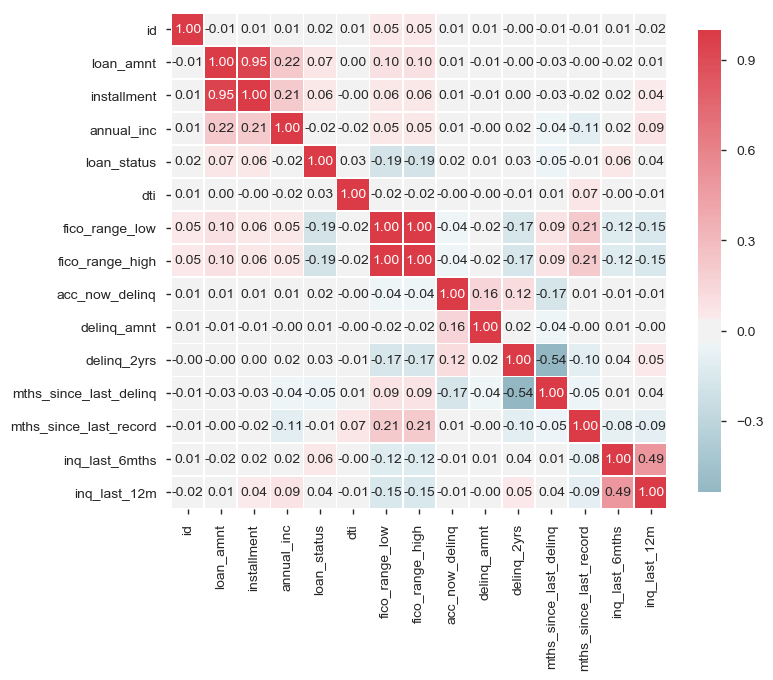

In [120]:
def corr_heatmap(v,data):
    correlations = data[v].corr()

    # Create color map ranging between two colors
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    plt.show();
    
#v = meta[(meta.var_type == 'interval') & (meta.keep)].index
corr_heatmap(data.columns,data)

#### What I find:
* loan_amnt and installment is highly correlated (0.95)
* fico_range_high and fico_range_low is highly correlated (1)

### Borrowers who default ( target=1 )
* check the categorical variables that the borrowers with target = 1 to further explore the relationship among variables and the target variable.

In [92]:
def PositiveRate_Barplot(col,target,data):

    for f in col:
        plt.figure()
        sns.set(style="whitegrid")
        fig, ax = plt.subplots(figsize=(8,4))
    
    # Calculate the percentage of target=1 per category value
        cat_perc = data[[f, target]].groupby([f],as_index=False).mean()
    # Bar plot
        sns.barplot(ax=ax, x=f, y=target, data=cat_perc, order=cat_perc[f])

        plt.ylabel('Percentage', fontsize=10)
        plt.xlabel(f, fontsize=10)
        plt.tick_params(axis='x', labelsize=8, rotation=30)
        plt.show();

#### nominal variables

<Figure size 800x550 with 0 Axes>

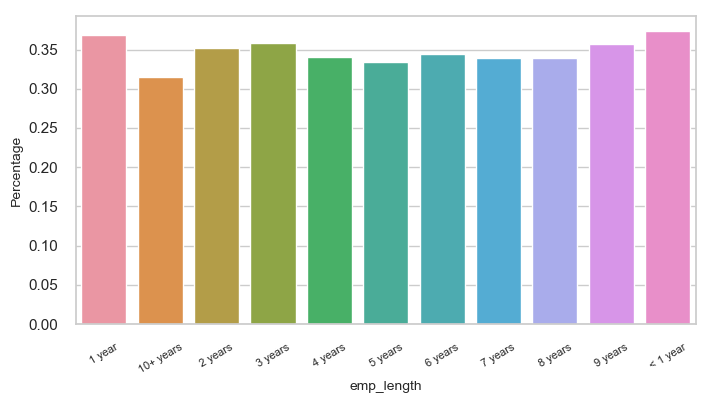

<Figure size 800x550 with 0 Axes>

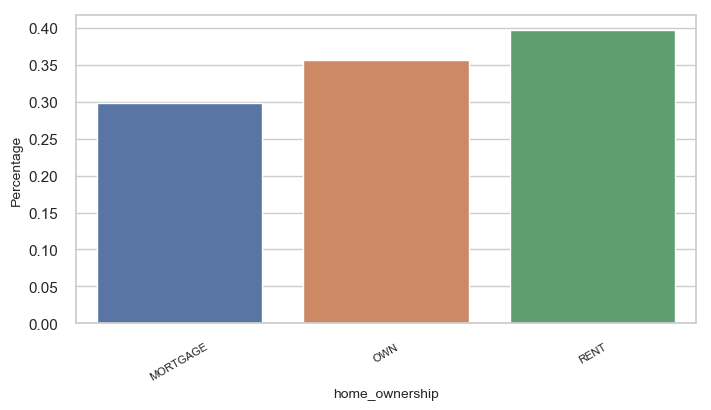

<Figure size 800x550 with 0 Axes>

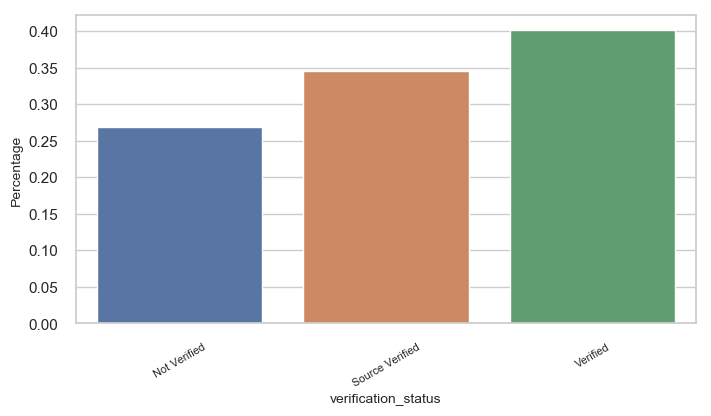

<Figure size 800x550 with 0 Axes>

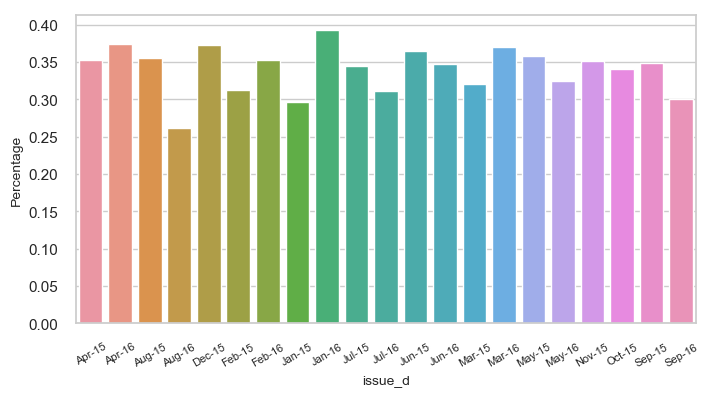

<Figure size 800x550 with 0 Axes>

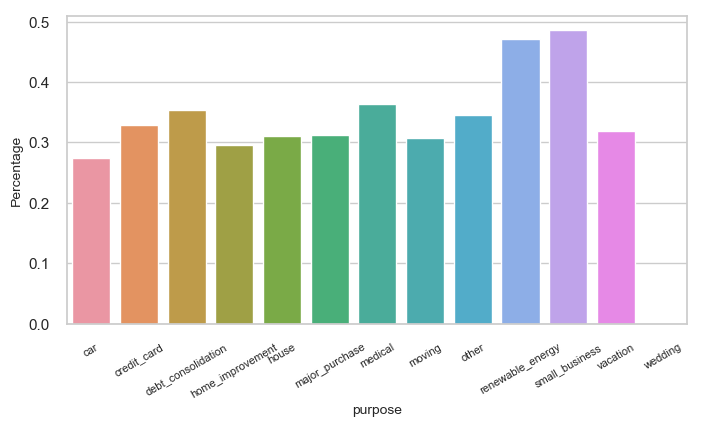

<Figure size 800x550 with 0 Axes>

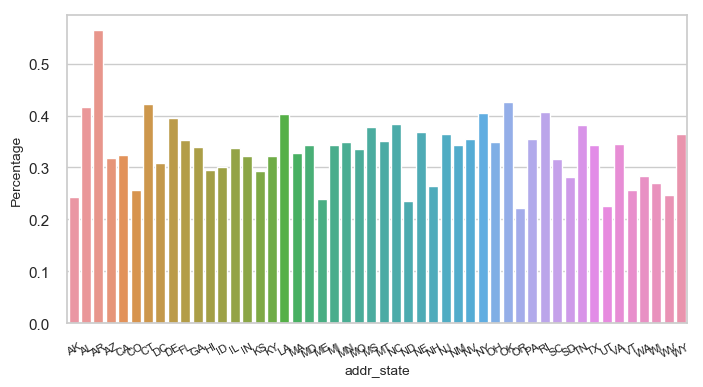

<Figure size 800x550 with 0 Axes>

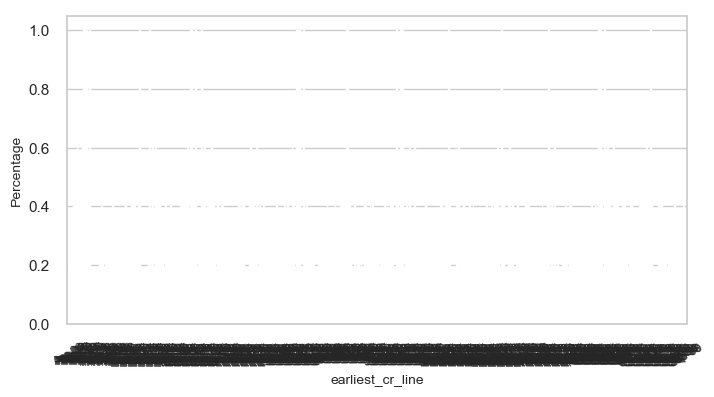

In [110]:
v = meta[(meta.var_type == 'nominal') & (meta.keep)].index
PositiveRate_Barplot(col=v,target='loan_status',data=data)

#### Ordinal variables

<Figure size 800x550 with 0 Axes>

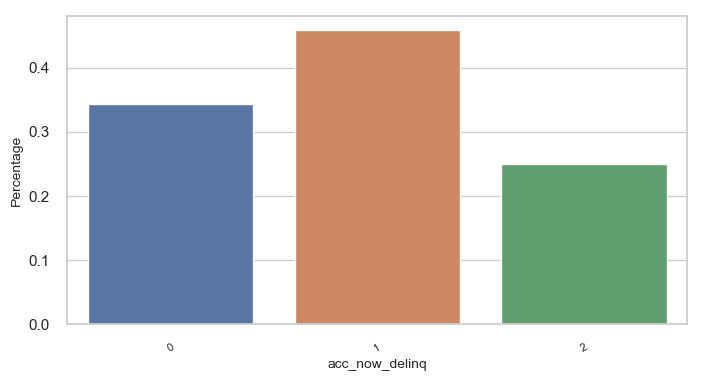

<Figure size 800x550 with 0 Axes>

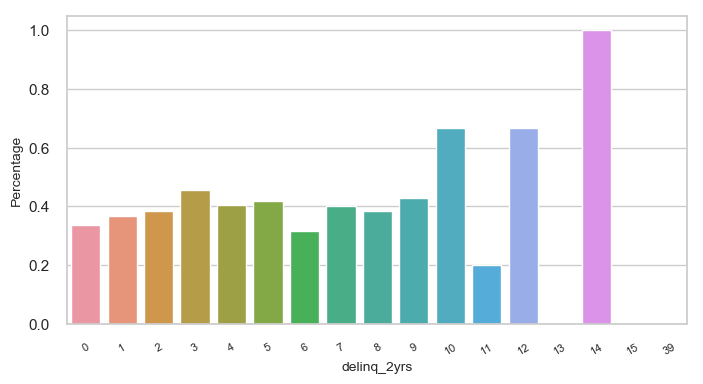

<Figure size 800x550 with 0 Axes>

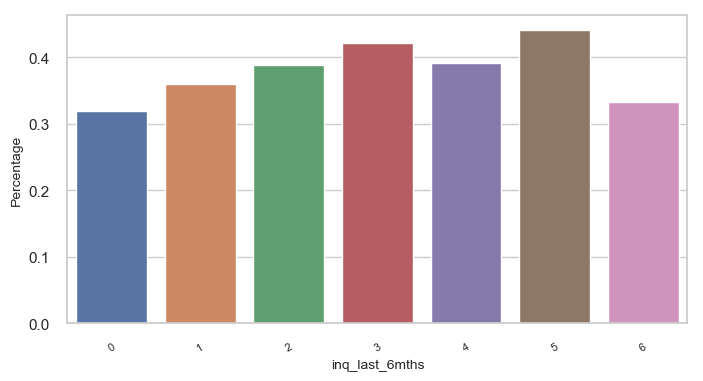

In [113]:
v = meta[(meta.var_type == 'ordinal') & (meta.keep)].index
PositiveRate_Barplot(col=v,target='loan_status',data=data)

#### Binary variable

<Figure size 800x550 with 0 Axes>

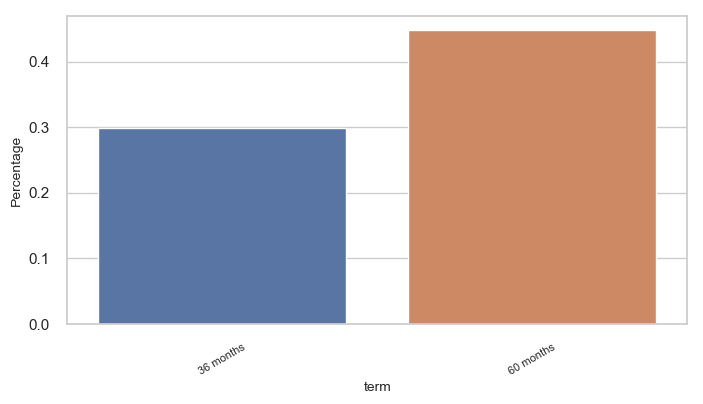

In [114]:
v=['term']
PositiveRate_Barplot(col=v,target='loan_status',data=data)

### variable about State

In [134]:
# encode the state has less than 1000 applicants as 'Others'
number_addr_state = data.addr_state.map(data.addr_state.value_counts(dropna=False))
threshold = 500
index = number_addr_state < threshold
data.loc[index,['addr_state']]='Others'


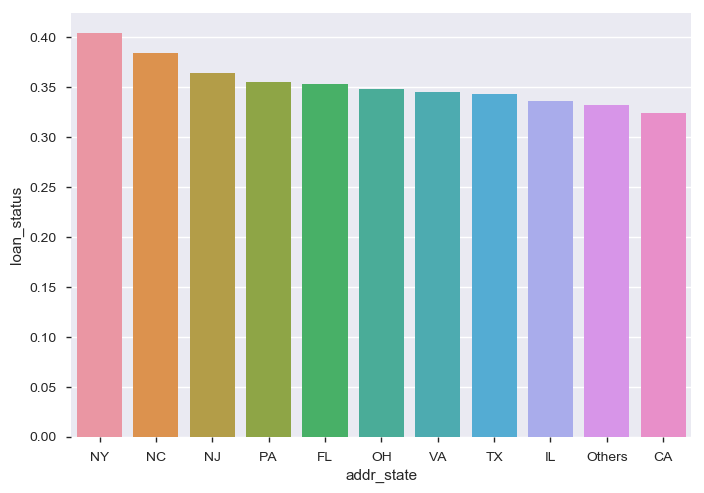

In [135]:
#sort fraud rates
sns.set_palette("Blues_r")

# Calculate the percentage of target=1 per category value
cat_perc = data[['addr_state', 'loan_status']].groupby(['addr_state'],as_index=False).mean()
cat_perc.sort_values(by='loan_status',ascending=False,inplace=True)
 
ax = sns.barplot(x='addr_state', y='loan_status', data=cat_perc, order=cat_perc['addr_state'])


In [136]:
#the number of variables per role and level are displayed
pd.DataFrame({'count' : meta.groupby(['role', 'var_type'])['role'].size()}).reset_index()

,role,var_type,count
0,id,ordinal,1
1,input,binary,1
2,input,interval,10
3,input,nominal,7
4,input,ordinal,3
5,target,binary,1


In [138]:
data.to_csv('data1.csv')
meta.to_csv('meta_data.csv')